In [38]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
sv = pd.read_csv("Статистика_за_2018_год.csv", engine = 'python')

In [40]:
sv.head(5)

,Число бракованных листов,Скорость прокатки,Марка стали
0,3,3.8,A
1,3,3.8,B
2,3,4.8,B
3,4,4.4,B
4,6,5.0,B


Посмотрим на описательную статистику исходных данных. Данные представлены двумя рядами - "Число бракованных листов" и "Скорость прокатки", каждый ряд содержит 237 элементов

In [23]:
sv.describe()

,Число бракованных листов,Скорость прокатки
count,237.000000,237.000000
mean,3.257384,4.509705
std,1.807821,0.696260
min,0.000000,2.500000
25%,2.000000,4.100000
50%,3.000000,4.600000
75%,4.000000,5.000000
max,8.000000,6.500000


Посмотрим на распределение ряда "Число бракованных листов"

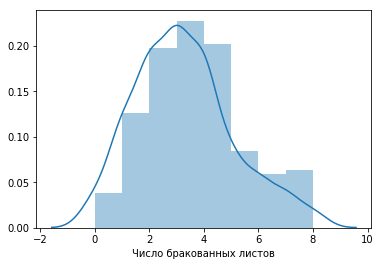

In [12]:
sns.distplot(sv["Число бракованных листов"],bins=np.arange(sv["Число бракованных листов"].min(), sv["Число бракованных листов"].max()+ 1))

Распределение  ряда "Число бракованных листов" похоже на нормальное, в данных отсутствуют большие выбросы. Разделим ряд на две подвыборки в соответствии с маркой, новые подвыборки назовем svA для марки стали А и svB для марки стали B.

In [20]:
svA = sv[sv["Марка стали"] == 'A']
svB = sv[sv["Марка стали"] == 'B']

Посмотрим на описательную статистику новых подвыборок. Оба ряда в подвыборке svA - "Число бракованных листов" и "Скорость прокатки" - имеют схожее матожидание и дисперсию c аналогичными рядами в подвыборке svB, при этом подвыборка svA представлена 139 элементами, а подвыборка svB - 98 элементами.

In [21]:
svA.describe()

,Число бракованных листов,Скорость прокатки
count,139.000000,139.000000
mean,3.179856,4.475540
std,1.889144,0.684703
min,0.000000,2.800000
25%,2.000000,4.000000
50%,3.000000,4.600000
75%,4.000000,4.900000
max,8.000000,6.200000


In [22]:
svB.describe()

,Число бракованных листов,Скорость прокатки
count,98.000000,98.000000
mean,3.367347,4.558163
std,1.689188,0.713048
min,0.000000,2.500000
25%,2.000000,4.100000
50%,3.000000,4.600000
75%,4.000000,5.000000
max,8.000000,6.500000


Распределегие подвыборок svA и svB похоже на нормальное, в данных нет выбросов.

C:\Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


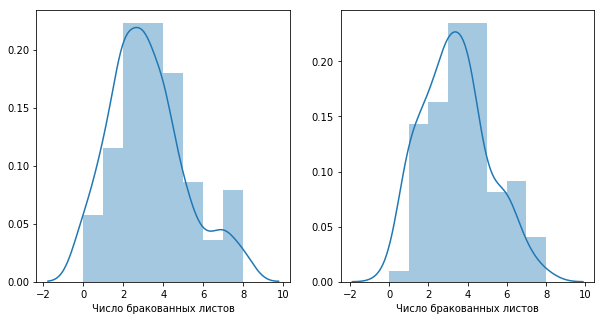

In [8]:
plt.figure(figsize = (10,5))
plt.subplot(121)
sns.distplot(svA["Число бракованных листов"],bins=np.arange(svA["Число бракованных листов"].min(), svA["Число бракованных листов"].max()+ 1))
plt.subplot(122)
sns.distplot(svB["Число бракованных листов"],bins=np.arange(svB["Число бракованных листов"].min(), svB["Число бракованных листов"].max()+ 1))

Для того, чтобы доказать, что более 3 бракованных листов на партию выходит значимо чаще для стали марки А, чем для стали марки B, проведем статистический эксперимент. Поскольку подвыборки svA и svB имеют разный размер, возьмем 50 случайных значений из подвыборок svA и svB (ряд - "Числов бракованных листов") и оценим плотность распределения вероятности двух случайных величин при условии, что распределение нормальное. Затем оценим вероятность попадания двух случайных величин в участок от 4 до 8 - нас интересуют случаи более 3 бракованных листов на партию, при этом максимальное количество бракованных листов на партию, которое встречается в обоих подвыборках - 8 листов. Для проведения эксперимента используется функция probability_test.

In [14]:
svA = svA.sample(50, random_state = 42)
svB = svB.sample(50, random_state = 42)

In [25]:
from math import erf, sqrt
def probability_test(mu,sigma,x1,x2):
    # probability from Z=0 to lower bound
    double_prob = erf( (x1-mu) / (sigma*sqrt(2)) )
    p_lower = double_prob/2
    print(f'\n Lower Bound: {round(p_lower,4)}')
    
    # probability from Z=0 to upper bound
    double_prob = erf( (x2-mu) / (sigma*sqrt(2)) )
    p_upper = double_prob/2
    print(f'\n Upper Bound: {round(p_upper,4)}')
    
    Pin = (p_upper) - (p_lower)
    print('\n')
    print(f'mean = {round(mu,2)}    std dev = {round(sigma,2)} \n')
    print(f'Calculating the probability of occurring between {x1} <--> {x2} \n')
    print(f'inside interval Pin = {round(Pin*100,1)}%')
    print(f'outside interval Pout = {round((1-Pin)*100,1)}% \n')  

In [18]:
probability_test(np.mean(svA["Число бракованных листов"]),np.std(svA["Число бракованных листов"]) ,4,8)


 Lower Bound: 0.1779

 Upper Bound: 0.4915


mean = 3.04    std dev = 2.08 

Calculating the probability of occurring between 4 <--> 8 

inside interval Pin = 31.4%
outside interval Pout = 68.6% 



In [19]:
probability_test(np.mean(svB["Число бракованных листов"]),np.std(svB["Число бракованных листов"]) ,4,8)


 Lower Bound: 0.2318

 Upper Bound: 0.4997


mean = 3.12    std dev = 1.42 

Calculating the probability of occurring between 4 <--> 8 

inside interval Pin = 26.8%
outside interval Pout = 73.2% 



По результатам эксперимента вероятность попадания в участок от 4 до 8 для случайных элементов из подвыборки svA составила 31,4%, для svB - 26,8%. Вероятность получить более 3 бракованных листов на партию для стали марки больше на 4,6%.

Для решения второй задачи разделим исходные данные на 2 подвыборки - svF для скорости прокатки более 4 м/c, svS - для скорости прокатки менее 4 м/c.

In [26]:
svF = sv[sv['Скорость прокатки'] >4]
svS= sv[sv['Скорость прокатки'] <=4]

Посмотрим на описательные статистики двух подвыборок. Подвыборка svF представлена 179 элементами, подвыборка svS - 58 элементами.

In [27]:
svF.describe()

,Число бракованных листов,Скорость прокатки
count,179.000000,179.000000
mean,3.318436,4.801676
std,1.800202,0.500390
min,0.000000,4.100000
25%,2.000000,4.400000
50%,3.000000,4.700000
75%,4.000000,5.100000
max,8.000000,6.500000


In [399]:
svS.describe()

,Число бракованных листов,Скорость прокатки
count,58.000000,58.000000
mean,3.068966,3.608621
std,1.834007,0.362392
min,0.000000,2.500000
25%,2.000000,3.400000
50%,3.000000,3.700000
75%,4.000000,3.900000
max,8.000000,4.000000


Распределегие подвыборок svF и svS похоже на нормальное, при этом распределение подвыборки svS немного скошено вправо.

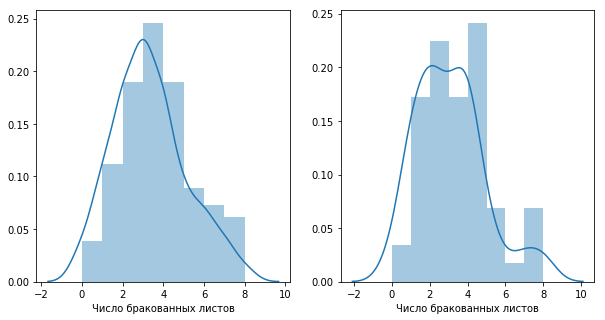

In [32]:
plt.figure(figsize = (10,5))
plt.subplot(121)
sns.distplot(svF["Число бракованных листов"],bins=np.arange(svF["Число бракованных листов"].min(), svF["Число бракованных листов"].max()+ 1))
plt.subplot(122)
sns.distplot(svS["Число бракованных листов"],bins=np.arange(svS["Число бракованных листов"].min(), svS["Число бракованных листов"].max()+ 1))

Проведем аналогичный статистический эксперимент для подвыборок svF, svS. Для проведения эксперимента используется функция probability_test.

In [35]:
svF = svF.sample(50, random_state = 42)
svS = svS.sample(50, random_state = 42)

In [36]:
probability_test(np.mean(svF["Число бракованных листов"]),np.std(svF["Число бракованных листов"]) ,4,8)


 Lower Bound: 0.1375

 Upper Bound: 0.4946


mean = 3.36    std dev = 1.82 

Calculating the probability of occurring between 4 <--> 8 

inside interval Pin = 35.7%
outside interval Pout = 64.3% 



In [37]:
probability_test(np.mean(svS["Число бракованных листов"]),np.std(svS["Число бракованных листов"]) ,4,8)


 Lower Bound: 0.1955

 Upper Bound: 0.4964


mean = 3.06    std dev = 1.84 

Calculating the probability of occurring between 4 <--> 8 

inside interval Pin = 30.1%
outside interval Pout = 69.9% 



По результатам эксперимента вероятность попадания в участок от 4 до 8 для случайных элементов из подвыборки svF составила 35,7%, для svS - 30,1%. Вероятность получить более 3 бракованных листов на партию при скоростях прокатки более 4 м/c больше на 5,6%.